In [1310]:
import json
import random

dataset_info_path = '/mnt/hdd3/datasets/hyper_penguin/hyper_penguin/hyper_penguin.json'

with open(dataset_info_path, 'r') as f:
    dataset_info = json.load(f)

random_info = random.choice(dataset_info)
print(random_info)

annotation = random_info['annotation']
bbox = annotation[0]['bbox']
print(annotation[0])
print(bbox)

{'image_id': '20230621103426', 'meta_data': {'height': 1080, 'width': 2048, 'band': 151, 'date': '20230621', 'time': '103426', 'set': 'set1', 'weather': 'sunny', 'scanrate': 's90', 'gain': 'g100', 'skip_line': '3', 'exposure_time': '10.99ms', 'black_image_id': 'b20230621101951', 'white_image_id': 'w20230621102050'}, 'annotation': [{'penguin_id': '0146', 'bbox': [1121, 135, 183, 335], 'segmentation_mask': '20230621103426_0146.png'}, {'penguin_id': '0343', 'bbox': [528, 359, 188, 88], 'segmentation_mask': '20230621103426_0343.png'}, {'penguin_id': '0447', 'bbox': [529, 693, 187, 254], 'segmentation_mask': '20230621103426_0447.png'}, {'penguin_id': '0477', 'bbox': [367, 699, 134, 213], 'segmentation_mask': '20230621103426_0477.png'}]}
{'penguin_id': '0146', 'bbox': [1121, 135, 183, 335], 'segmentation_mask': '20230621103426_0146.png'}
[1121, 135, 183, 335]


In [1311]:
import h5py
import numpy as np
from hsitools.convert import hs_to_rgb, gamma_correction

hdf5_path = '/mnt/hdd3/datasets/hyper_penguin/hyper_penguin/hyper_penguin.h5'
with h5py.File(hdf5_path, 'r') as file:
    rgb_img = file[f'rgb/{random_info["image_id"]}.png'][:].astype('uint8')
print(np.max(rgb_img), np.min(rgb_img))

150 35


(1080, 2048, 3)


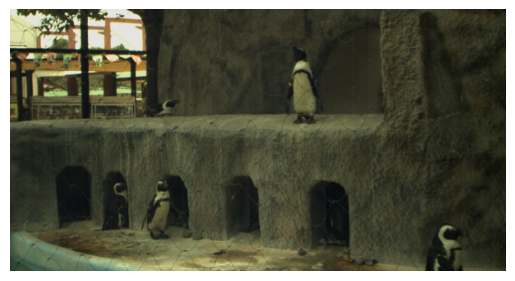

In [1312]:
import cv2
import matplotlib.pyplot as plt

rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
rgb_img = (rgb_img - np.min(rgb_img)) / (np.max(rgb_img) - np.min(rgb_img))

plt.axis('off')
plt.imshow(rgb_img)
print(rgb_img.shape)

In [1313]:
import numpy as np
import cv2

def bbox_center_mask(img: np.ndarray, crop_rate=0.2):
    x_center = int(img.shape[1] * 0.5)
    y_center = int(img.shape[0] * 0.5)

    left = x_center - int((img.shape[1]) * crop_rate / 2)
    right = x_center + int((img.shape[1]) * crop_rate / 2)
    top = y_center - int((img.shape[0]) * crop_rate / 2)
    bottom = y_center + int((img.shape[0]) * crop_rate / 2)
    crop = img[top:bottom, left:right]
    return crop

(335, 183, 3)


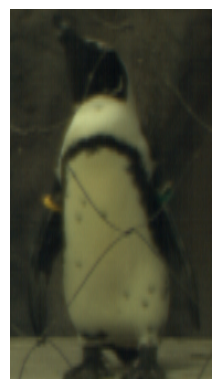

In [1314]:
crop_img = rgb_img[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
print(crop_img.shape)

plt.axis('off')
plt.imshow(crop_img)


(116, 64, 3)


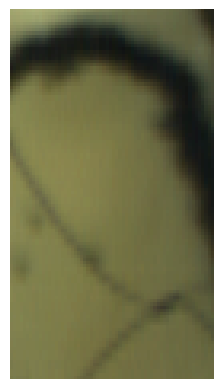

In [1315]:
crop_img_2 = bbox_center_mask(crop_img, crop_rate=0.35)

print(crop_img_2.shape)

plt.axis('off')
plt.imshow(crop_img)

plt.axis('off')
plt.imshow(crop_img_2)